# THE SPARK FOUNDATION

## DATA SCIENCE & BUSINESS ANALYST INTERN

### NAME: VIVEK PANDEY

<h3>Task:</h3><p>We have to Cluster The types of flower from Iris dataset using Unsupervised Learning.</p>

### Importing The Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Importing The Dataset

In [2]:
iris=pd.read_csv('iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print (iris.shape)

(150, 6)


In [5]:
print (iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [6]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### VISUALIZATION

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


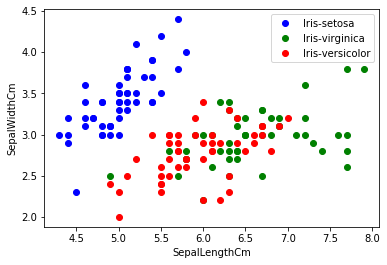

In [7]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.
setosa = iris[iris["Species"]=="Iris-setosa"]
virginica= iris[iris["Species"]=="Iris-virginica"]
versicolor = iris[iris["Species"]=="Iris-versicolor"]
a= setosa["SepalLengthCm"]
b = setosa["SepalWidthCm"]
c = virginica["SepalLengthCm"]
d = virginica["SepalWidthCm"]
e = versicolor["SepalLengthCm"]
f = versicolor["SepalWidthCm"]
plt.plot(a,b,'bo',label = "Iris-setosa") ;
plt.plot(c,d,"go",label = "Iris-virginica")
plt.plot(e,f,"ro",label ="Iris-versicolor")
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.legend()
plt.show()

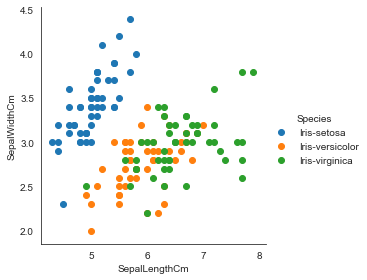

In [8]:
sns.set_style("white");
sns.FacetGrid(iris, hue="Species", height=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();

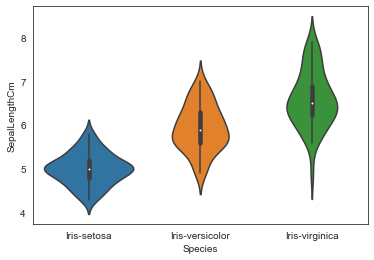

In [9]:
sns.violinplot(x="Species", y="SepalLengthCm", data=iris, size=8)
plt.show()

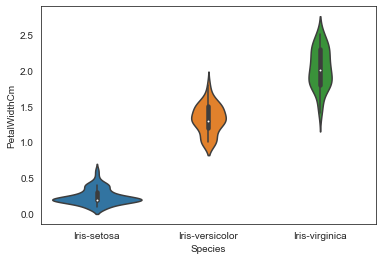

In [10]:
sns.violinplot(x="Species", y="PetalWidthCm", data=iris, size=8)
plt.show()

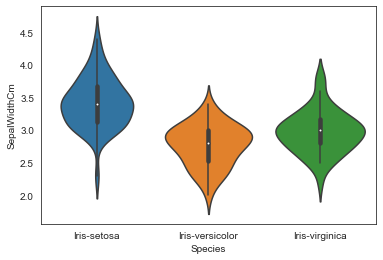

In [11]:
sns.violinplot(x="Species", y="SepalWidthCm", data=iris, size=8)
plt.show()

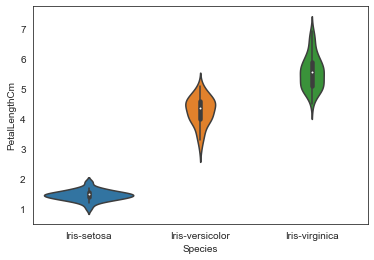

In [12]:
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=8)
plt.show()

Here We can See That Petal Length and Petal Width works Good to Differentiate SETOSA and Versicolor

### Finding the optimum number of clusters for k-means classification

In [13]:
x = iris.iloc[:, [ 1, 2, 3,4]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### Plotting the results onto a line graph

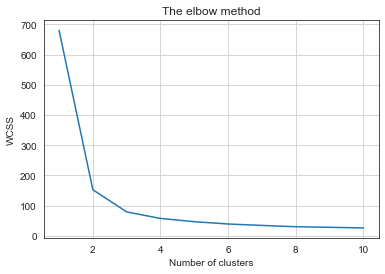

In [14]:
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'

### Applying kmeans to the dataset / Creating the kmeans classifier

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 1)
y_kmeans = kmeans.fit_predict(x)

### Visualising the clusters - On the first two columns

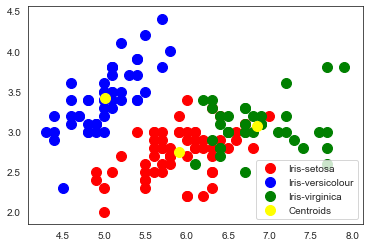

In [16]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()